# Transformada de Fourier 2D

## por: 
## Yennifer Angarita Aarenas
## Alejandro Mesa Gómez

En un ipython notebook realizar lo siguiente:
1. Leer la imagen RonchiH.png y graficar.
2. Realizar la transformada de Fourier y graficar la amplitud de la transformada de Fourier. Analizar el patrón.
3. Borrar la mitad del patrón, realizar la TF inversa, graficar y analizar el patrón.
4. Repetir el punto 3 con la otra mitad del patrón.
5. Repetir el punto tres borrando un área central del patrón. Usar diferentes áreas y analizar.
6. Repetir el punto tres borrando el área exterior del patrón. Usar diferentes áreas y analizar.
7. Repetir el punto 1 y 2 para la imagen RonchiV.png.
8. Tome la imagen Ronchi.png y utilice la transformada de Fourier para borrar (aproximado) el patrón del cuadro inferior derecho.

In [1]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import cmath as cm
from scipy import misc 
from scipy import stats

%matplotlib inline 
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Pulse para codigo</button>''', raw=True)

Pulse para codigo

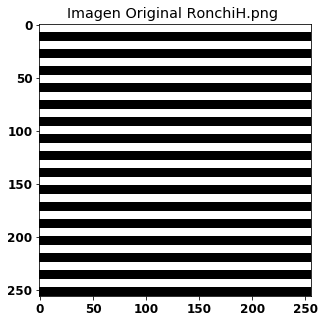

In [3]:
#1. Leer imagen y graficar

ImaH = misc.imread('RonchiH.png') # Se lee la imagen como matriz en escala de 8 bit
plt.figure(figsize=(5,5))
plt.imshow(ImaH, cmap='gray')
plt.title('Imagen Original RonchiH.png ')
plt.show()

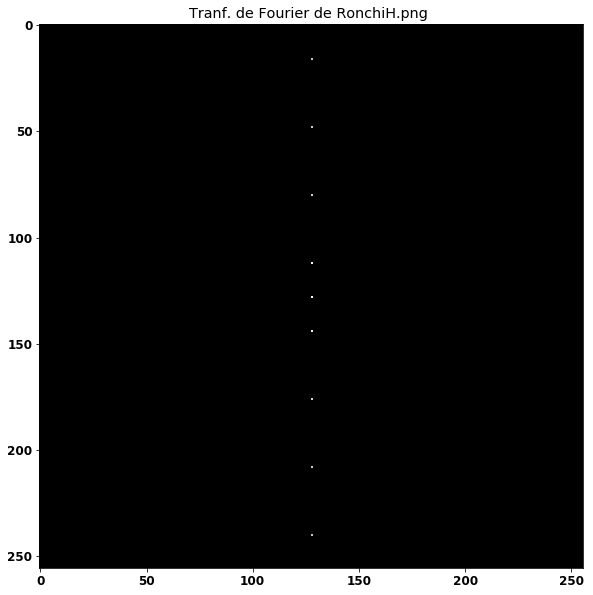

In [19]:
#2. tranformada de fourier y graficar la amplitud de la transformada.
ImaHc = np.copy(ImaH) #copia de la Imagen original.
dt = 0.001
tf1 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ImaHc)))*dt

plt.figure(figsize=(10,10))
plt.imshow(abs(tf1)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. de Fourier de RonchiH.png ')
plt.show()

En este caso la transforamada en dos dimensiones del patrón horizontal de ronchi genera un patrón vertical en todo el centro de la imagen donde su distancia disminuye poco a poco, conforme se acercan al centro pero de forma constante

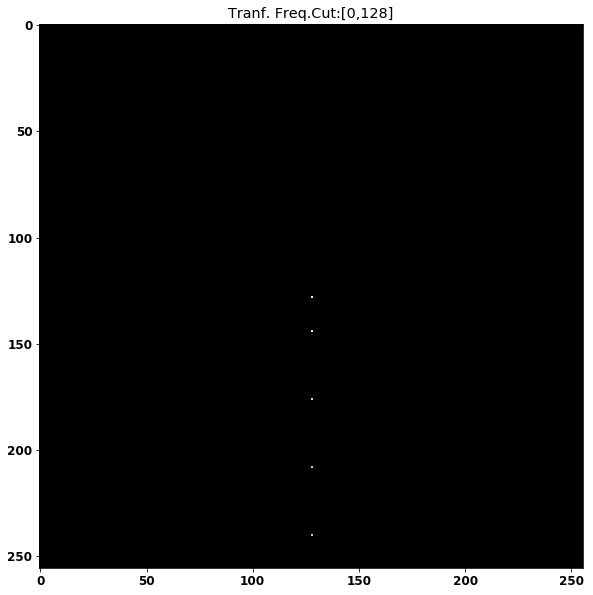

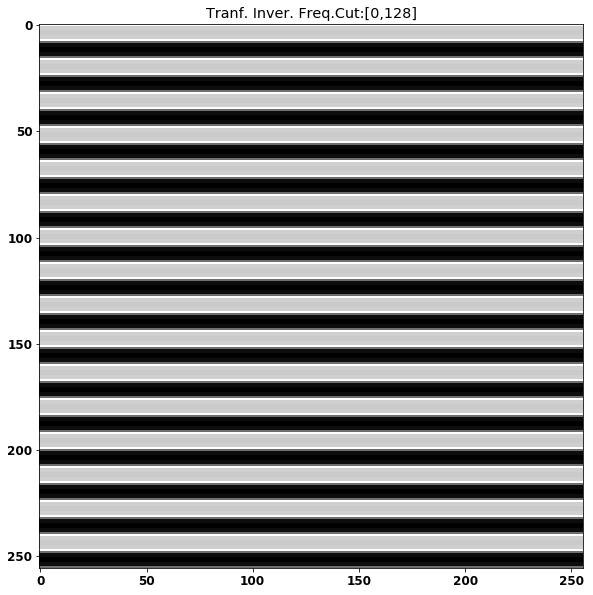

In [21]:
#3. Borrar la mitad del patrón, realizar la TF inversa, graficar

tf_cut1 = np.copy(tf1) #copia de la primera transformada de fourier de la Imagen original.
freqinf1 = 0
freqsup1 = 128

tf_cut1[freqinf1:freqsup1,:] = 0.+1j*0. #corte de las frecuencias.

invtf1 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf_cut1)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(121)
plt.figure(figsize=(10,10))
plt.imshow(abs(tf_cut1)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf1,freqsup1))
#plt.show()
#plt.subplot(122)
plt.figure(figsize=(10,10))
plt.imshow(abs(invtf1),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf1,freqsup1))
#plt.show()


Al eliminar la información de las amplitudes superiores, se observa claramente como en al aplicar la transformada inversa, las lineas blancas se ven afectadas, ya que se atenuan, dejando solo dos lineas blancas pequeñas en el borde de las cintas originales y una banda gris en el medio 

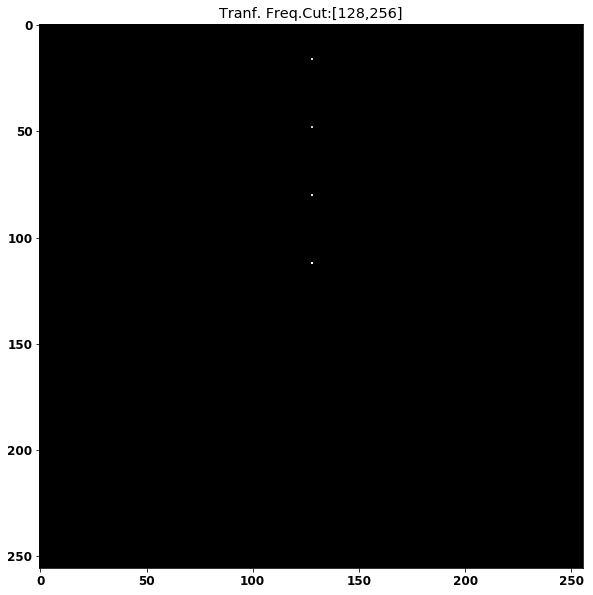

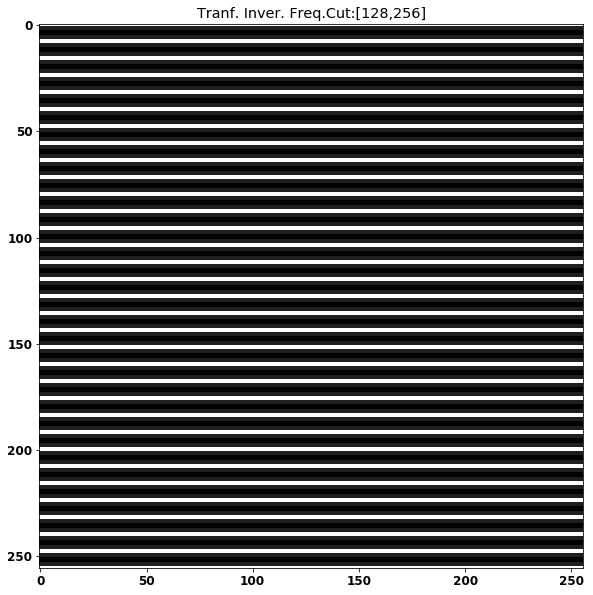

In [22]:
#4. Borrar la OTRA mitad del patrón, realizar la TF inversa, graficar

tf_cut2 = np.copy(tf1) #copia de la primera transformada de fourier de la Imagen original.
freqinf2 = 128
freqsup2 = 256

tf_cut2[freqinf2:freqsup2,:] = 0.+1j*0. #corte de las frecuencias.

invtf2 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf_cut2)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(121)
plt.figure(figsize=(10,10))
plt.imshow(abs(tf_cut2)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf2,freqsup2))
plt.show()
#plt.subplot(122)
plt.figure(figsize=(10,10))
plt.imshow(abs(invtf2),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf2,freqsup2))
plt.show()

En este caso, al eliminar la información de los puntos inferiores, la cantidad de lineas negras se dobla y las bandas blancas se reducen significativamente en grosor  

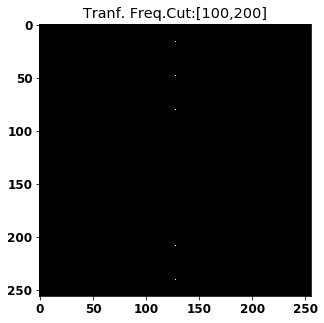

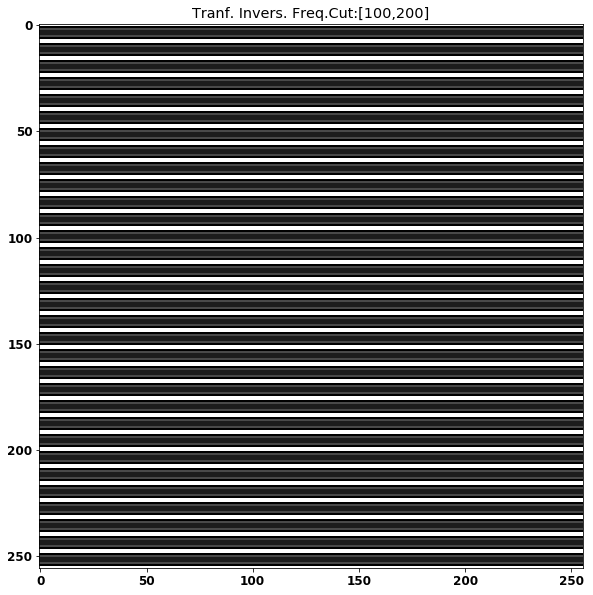

al eliminar el area interior con un grosor de aproximadamente 100 pixeles, se puede notar como las lineas negras tambien empiezan a desvanecer, quedando solo una linea intensa dentro de una cienta de tono grisaseo


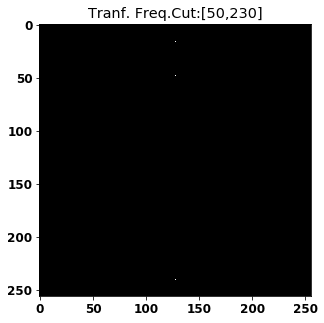

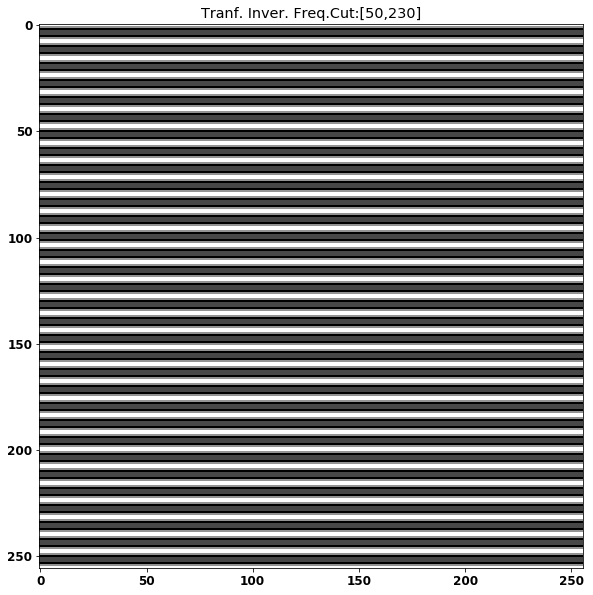

cuando se elimina una banda de 180 pixeles, la información de casi toda la imagen está perdida, solo quedan los contornos de las bandas negras, de color intenso, el resto de la imagen está atenuado


In [30]:
#5. Repetir el punto tres borrando un área central del patrón. Usar diferentes áreas y analizar.
#-----------------------------------------------------------------------------------------------------------------
#Area interna 1
#-----------------------------------------------------------------------------------------------------------------

tf_cut3 = np.copy(tf1) #copia de la primera transformada de fourier de la Imagen original.
freqinf3 = 100
freqsup3 = 200

tf_cut3[freqinf3:freqsup3,:] = 0.+1j*0. #corte de las frecuencias.

invtf3 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf_cut3)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(2,2,1)
plt.figure(figsize=(5,5))
plt.imshow(abs(tf_cut3)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf3,freqsup3))
plt.show()
#plt.subplot(2,2,2)
plt.figure(figsize=(10,10))
plt.imshow(abs(invtf3),cmap='gray', interpolation='none')
plt.title('Tranf. Invers. Freq.Cut:[%s,%s]'%(freqinf3,freqsup3))
plt.show()

print ('al eliminar el area interior con un grosor de aproximadamente 100 pixeles, se puede notar como las lineas negras tambien empiezan a desvanecer, quedando solo una linea intensa dentro de una cienta de tono grisaseo')
#-----------------------------------------------------------------------------------------------------------------
#Area interna 2
#-----------------------------------------------------------------------------------------------------------------
tf_cut4 = np.copy(tf1) #copia de la primera transformada de fourier de la Imagen original.
freqinf4 = 50
freqsup4 = 230

tf_cut4[freqinf4:freqsup4,:] = 0.+1j*0. #corte de las frecuencias.

invtf4 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf_cut4)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(2,2,3)
plt.figure(figsize=(5,5))
plt.imshow(abs(tf_cut4)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf4,freqsup4))
plt.show()
#plt.subplot(2,2,4)
plt.figure(figsize=(10,10))
plt.imshow(abs(invtf4),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf4,freqsup4))
plt.show()

print ('cuando se elimina una banda de 180 pixeles, la información de casi toda la imagen está perdida, solo quedan los contornos de las bandas negras, de color intenso, el resto de la imagen está atenuado')


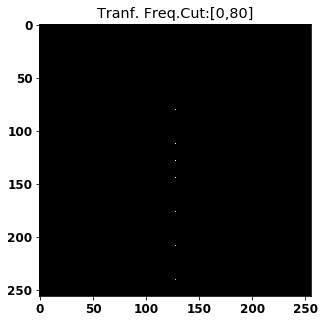

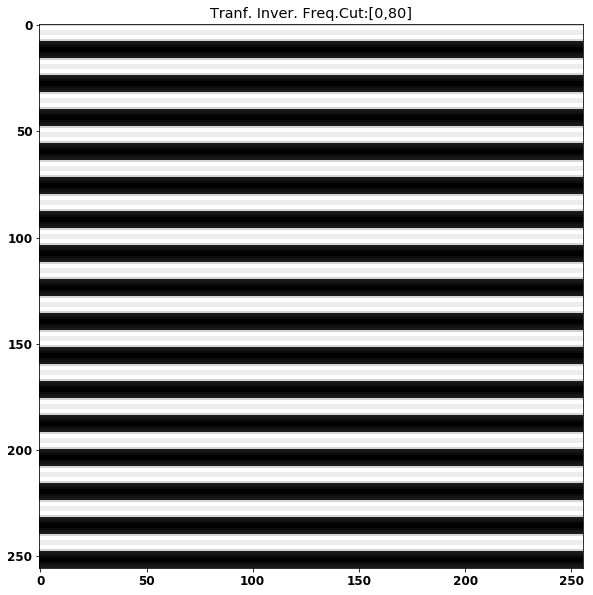

al cortar solo una banda de la zona superior de unos 80 pixeles, se puede ver como la imagen sigue casi intacta, pero empiezan a aparecer unas tenues lineas grises de información perdida dentro de las bandas blancas


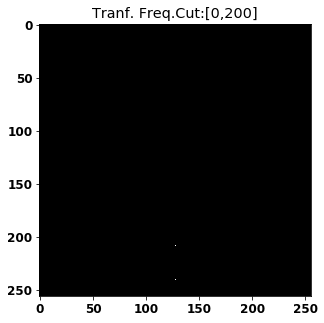

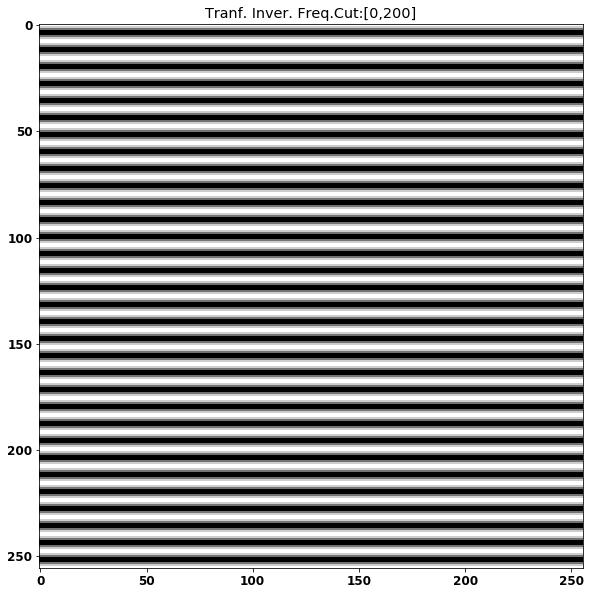

al dejar solo la banda inferior de 50 pix. las lineas de la imagen se reducen significativamente de tamaño y de intensidad


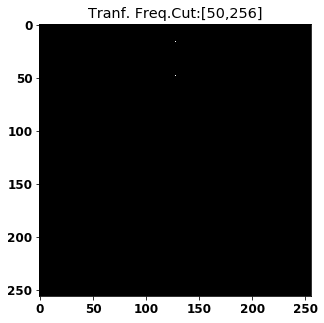

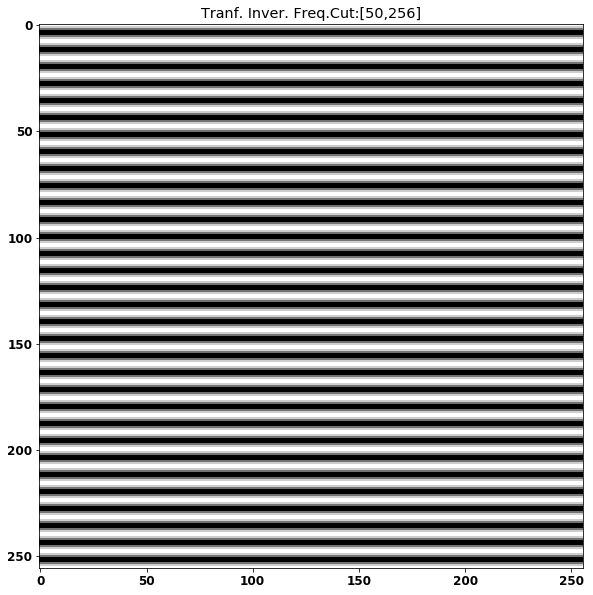

al dejar solo la banda superior de 50 pix. se obtiene un resultado similar al de el filtrado anterior


In [34]:
#6. Repetir el punto tres borrando el área exterior del patrón. Usar diferentes áreas y analizar.
#-----------------------------------------------------------------------------------------------------------------
#Area externa 1
#-----------------------------------------------------------------------------------------------------------------
tf_cut5 = np.copy(tf1) #copia de la primera transformada de fourier de la Imagen original.
freqinf5 = 0
freqsup5 = 80

tf_cut5[freqinf5:freqsup5,:] = 0.+1j*0. #corte de frecuencias

invtf5 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf_cut5)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(3,2,1)
plt.figure(figsize=(5,5))
plt.imshow(abs(tf_cut5)**(1/8), cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf5,freqsup5))
plt.show()
#plt.subplot(3,2,2)
plt.figure(figsize=(10,10))
plt.imshow(abs(invtf5),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf5,freqsup5))
plt.show()
print('al cortar solo una banda de la zona superior de unos 80 pixeles, se puede ver como la imagen sigue casi intacta, pero empiezan a aparecer unas tenues lineas grises de información perdida dentro de las bandas blancas')
#-----------------------------------------------------------------------------------------------------------------
#Area externa 2
#-----------------------------------------------------------------------------------------------------------------

tf_cut6 = np.copy(tf1) #copia de la primera transformada de fourier de la Imagen original.
freqinf6 = 0
freqsup6 = 200

tf_cut6[freqinf6:freqsup6,:] = 0.+1j*0. #corte de frecuecias

invtf6 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf_cut6)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(3,2,3)
plt.figure(figsize=(5,5))
plt.imshow(abs(tf_cut6)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf6,freqsup6))
plt.show()
#plt.subplot(3,2,4)
plt.figure(figsize=(10,10))
plt.imshow(abs(invtf6),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf6,freqsup6))
plt.show()
print ('al dejar solo la banda inferior de 50 pix. las lineas de la imagen se reducen significativamente de tamaño y de intensidad')
#-----------------------------------------------------------------------------------------------------------------
#Area externa 3
#-----------------------------------------------------------------------------------------------------------------

tf_cut7 = np.copy(tf1) #copia de la primera transformada de fourier de la Imagen original.
freqinf7 = 50
freqsup7 = 256

tf_cut7[freqinf7:freqsup7,:] = 0.+1j*0. #corte de frecuencias

invtf7 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf_cut7)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(3,2,5)
plt.figure(figsize=(5,5))
plt.imshow(abs(tf_cut7)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf7,freqsup7))
plt.show()
#plt.subplot(3,2,6)
plt.figure(figsize=(10,10))
plt.imshow(abs(invtf7),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf7,freqsup7))
plt.show()
print ('al dejar solo la banda superior de 50 pix. se obtiene un resultado similar al de el filtrado anterior')

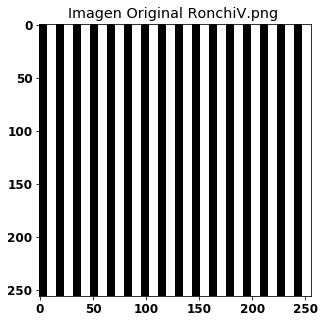

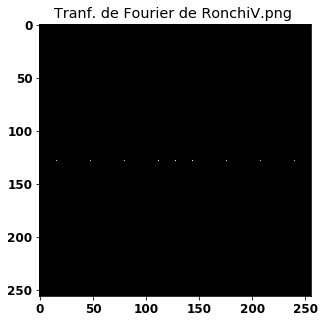

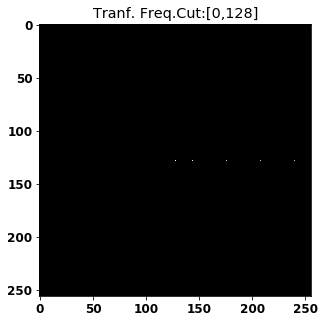

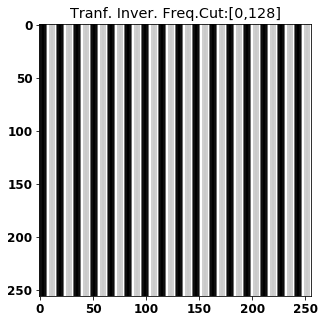

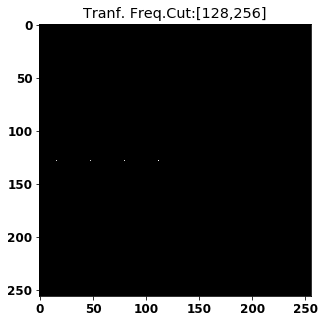

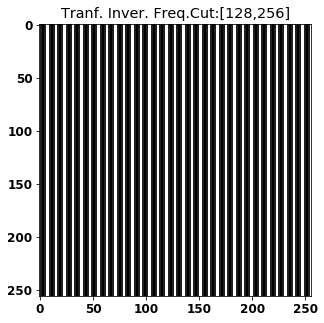

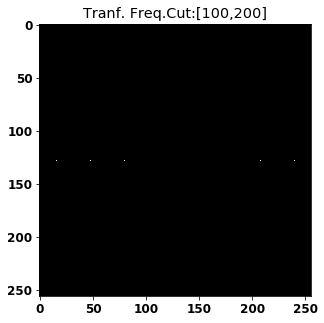

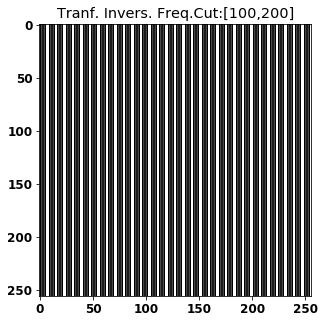

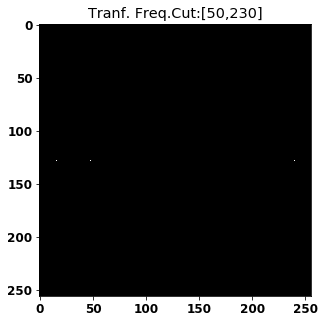

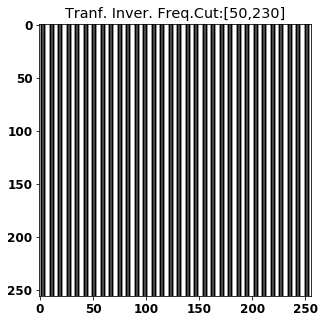

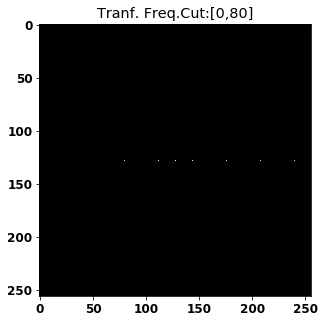

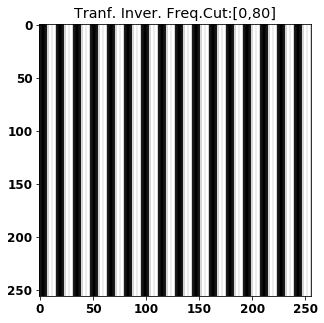

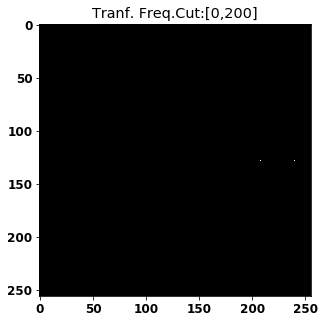

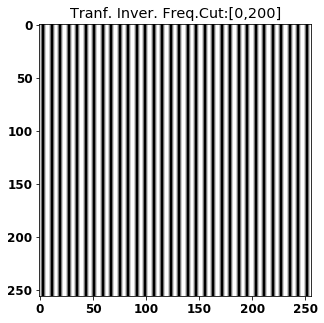

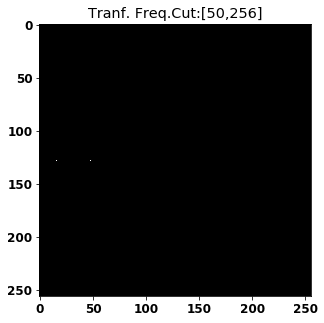

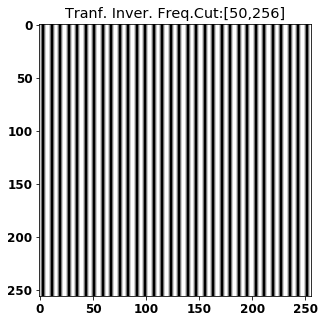

In [9]:
#7. Repetir el punto 1 y 2 para la imagen RonchiV.png.

#-----------------------------------------------------------------------------------------------------------------
#Leer la imagen RonchiV.png
#-----------------------------------------------------------------------------------------------------------------
ImaV = misc.imread('RonchiV.png') # Se lee la imagen como matriz en escala de 8 bit
plt.figure(figsize=(5,5))
plt.imshow(ImaV, cmap='gray', interpolation='none')
plt.title('Imagen Original RonchiV.png ')
plt.show()
#-----------------------------------------------------------------------------------------------------------------
#Transformada de Fourier de RonchiV.png
#-----------------------------------------------------------------------------------------------------------------
dt = 0.001
ImaVc = np.copy(ImaV)
tf2 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ImaVc)))*dt

plt.figure(figsize=(5,5))
plt.imshow(abs(tf2)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. de Fourier de RonchiV.png ')
plt.show()
#-----------------------------------------------------------------------------------------------------------------
#Borar mitad del patron y realizar transf. invers.
#-----------------------------------------------------------------------------------------------------------------

tf2_cut1 = np.copy(tf2) #copia de la primera transformada de la imagen RochiV.png
freqinf1 = 0
freqsup1 = 128

tf2_cut1[:,freqinf1:freqsup1] = 0.+1j*0. #corte de frecuencias

invtf2_1 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf2_cut1)))*1/dt #Transformada inversa de la transformada cortada

plt.figure(figsize=(5,5))
plt.imshow(abs(tf2_cut1)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf1,freqsup1))
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(abs(invtf2_1),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf1,freqsup1))
plt.show()
#-----------------------------------------------------------------------------------------------------------------
#Repetir el punto 3 con la otra mitad del patrón.
#-----------------------------------------------------------------------------------------------------------------

tf2_cut2 = np.copy(tf2) #copia de la primera transformada de la imagen RochiV.png
freqinf2 = 128
freqsup2 = 256

tf2_cut2[:,freqinf2:freqsup2] = 0.+1j*0. #corte de frecuencias

invtf2_2 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf2_cut2)))*1/dt #Transformada inversa de la transformada cortada

plt.figure(figsize=(5,5))
plt.imshow(abs(tf2_cut2)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf2,freqsup2))
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(abs(invtf2_2),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf2,freqsup2))
plt.show()
#-----------------------------------------------------------------------------------------------------------------
#Repetir el punto 3 un área central del patrón. Usar diferentes áreas.
#-----------------------------------------------------------------------------------------------------------------
#Area interna 1

tf2_cut3 = np.copy(tf2) #copia de la primera transformada de la imagen RochiV.png
freqinf3 = 100
freqsup3 = 200

tf2_cut3[:,freqinf3:freqsup3] = 0.+1j*0.  #corte de frecuencias

invtf2_3 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf2_cut3)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(2,2,1)
plt.figure(figsize=(5,5))
plt.imshow(abs(tf2_cut3)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf3,freqsup3))
plt.show()
#plt.subplot(2,2,2)
plt.figure(figsize=(5,5))
plt.imshow(abs(invtf2_3),cmap='gray', interpolation='none')
plt.title('Tranf. Invers. Freq.Cut:[%s,%s]'%(freqinf3,freqsup3))
plt.show()
#-----------------------------------------------------------------------------------------------------------------
#Area interna 2

tf2_cut4 = np.copy(tf2) #copia de la primera transformada de la imagen RochiV.png
freqinf4 = 50
freqsup4 = 230

tf2_cut4[:,freqinf4:freqsup4] = 0.+1j*0.  #corte de frecuencias

invtf2_4 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf2_cut4)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(2,2,3)
plt.figure(figsize=(5,5))
plt.imshow(abs(tf2_cut4)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf4,freqsup4))
plt.show()
#plt.subplot(2,2,4)
plt.figure(figsize=(5,5))
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf4,freqsup4))
plt.imshow(abs(invtf2_4),cmap='gray', interpolation='none')
plt.show()
#-----------------------------------------------------------------------------------------------------------------
#Repetir el punto 3 un área central del patrón. Usar diferentes áreas.
#-----------------------------------------------------------------------------------------------------------------
#Area externa 1

tf2_cut5 = np.copy(tf2) #copia de la primera transformada de la imagen RochiV.png
freqinf5 = 0
freqsup5 = 80

tf2_cut5[:,freqinf5:freqsup5] = 0.+1j*0.  #corte de frecuencias

invtf2_5 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf2_cut5)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(3,2,1)
plt.figure(figsize=(5,5))
plt.imshow(abs(tf2_cut5)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf5,freqsup5))
plt.show()
#plt.subplot(3,2,2)
plt.figure(figsize=(5,5))
plt.imshow(abs(invtf2_5),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf5,freqsup5))
plt.show()
#-----------------------------------------------------------------------------------------------------------------
#Area externa 2

tf2_cut6 = np.copy(tf2) #copia de la primera transformada de la imagen RochiV.png
freqinf6 = 0
freqsup6 = 200

tf2_cut6[:,freqinf6:freqsup6] = 0.+1j*0.  #corte de frecuencias

invtf2_6 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf2_cut6)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(3,2,3)
plt.figure(figsize=(5,5))
plt.imshow(abs(tf2_cut6)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf6,freqsup6))
plt.show()
#plt.subplot(3,2,4)
plt.figure(figsize=(5,5))
plt.imshow(abs(invtf2_6),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf6,freqsup6))
plt.show()
#-----------------------------------------------------------------------------------------------------------------
#Area externa 3

tf2_cut7 = np.copy(tf2) #copia de la primera transformada de la imagen RochiV.png
freqinf7 = 50
freqsup7 = 256

tf2_cut7[:,freqinf7:freqsup7] = 0.+1j*0.  #corte de frecuencias

invtf2_7 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf2_cut7)))*1/dt #Transformada inversa de la transformada cortada

#plt.subplot(3,2,5)
plt.figure(figsize=(5,5))
plt.imshow(abs(tf2_cut7)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s]'%(freqinf7,freqsup7))
plt.show()
#plt.subplot(3,2,6)
plt.figure(figsize=(5,5))
plt.imshow(abs(invtf2_7),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s]'%(freqinf7,freqsup7))
plt.show()

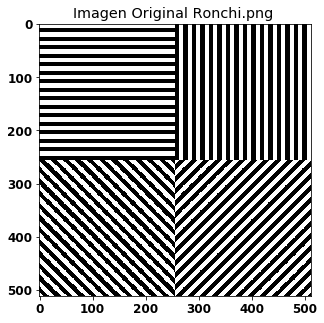

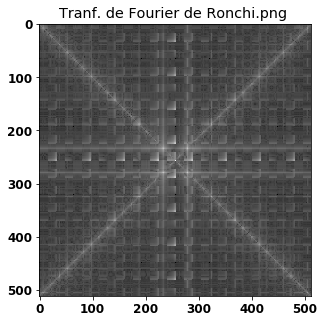

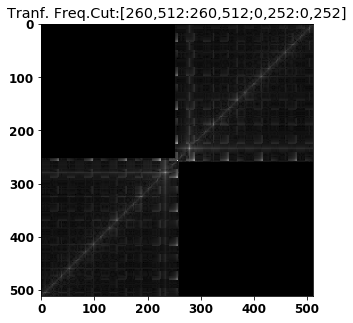

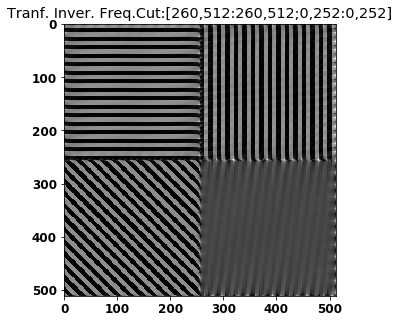

In [11]:
#8. Tome la imagen Ronchi.png y utilice la transformada de Fourier para borrar (aproximado) el patrón del cuadro 
#   inferior derecho.

#-----------------------------------------------------------------------------------------------------------------
#Leer la imagen Ronchi.png
#-----------------------------------------------------------------------------------------------------------------
Ima = misc.imread('Ronchi.png') # Se lee la imagen como matriz en escala de 8 bit
plt.figure(figsize=(5,5))
plt.imshow(Ima, cmap='gray', interpolation='none')
plt.title('Imagen Original Ronchi.png ')
plt.show()
#-----------------------------------------------------------------------------------------------------------------
#Transformada de Fourier de Ronchi.png
#-----------------------------------------------------------------------------------------------------------------
dt = 1
Imac = np.copy(Ima) #copia de la imagen original Ronchi.png
tf3 = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(Imac)))*dt #transformada de fourier de la imagen original Ronchi.png

plt.figure(figsize=(5,5))
plt.imshow(abs(tf3)**(1/8),cmap='gray', interpolation='none')
plt.title('Tranf. de Fourier de Ronchi.png ')
plt.show()
#-----------------------------------------------------------------------------------------------------------------
#Borar mitad del patron y realizar transf. invers.
#-----------------------------------------------------------------------------------------------------------------
tf3_cut1 = np.copy(tf3) #copia de la primera tranformada de fourier de Ronchi.png
freqinfx1 = 260
freqsupx1 = 512
freqinfy1 = 260
freqsupy1 = 512

tf3_cut1[freqinfx1:freqsupx1,freqinfy1:freqsupy1] = 0.+1j*0. #primer corte de la tran. de fourier de Ronchi.png

tf3_cut2 = tf3_cut1
freqinfx2 = 0
freqsupx2 = 252
freqinfy2 = 0
freqsupy2 = 252

tf3_cut2[freqinfx2:freqsupx2,freqinfy2:freqsupy2] = 0.+1j*0. #segundo corte de la tran. de fourier de Ronchi.png teniendo en cuenta los valores complejos.

invtf3_2 = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(tf3_cut2)))*1/dt  #Transformada inversa de la transformada cortada dos veces

plt.figure(figsize=(5,5))
plt.imshow(abs(tf3_cut2)**(1/4),cmap='gray', interpolation='none')
plt.title('Tranf. Freq.Cut:[%s,%s:%s,%s;%s,%s:%s,%s]'%(freqinfx1,freqsupx1,freqinfy1,freqsupy1,freqinfx2,freqsupx2,freqinfy2,freqsupy2))
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(abs(invtf3_2)**(1/1),cmap='gray', interpolation='none')
plt.title('Tranf. Inver. Freq.Cut:[%s,%s:%s,%s;%s,%s:%s,%s]'%(freqinfx1,freqsupx1,freqinfy1,freqsupy1,freqinfx2,freqsupx2,freqinfy2,freqsupy2))
plt.show()

al hacer recortes en las imagenes, se eliminan frecuencias de la transformada, las cuales contienen tanto  informacion como ruido, al hacer la transformada de estas imagenes recortadas, se obtiene una imagen filtrada, ya sea porque se requería eliminar una fuente conocida de ruido o una reguion defectuosa que afectara la informacion del resto de la imagen.